# Scotchy Scotch Scotch

In [1]:
# Load the Scotch dataset and take a peek

import numpy as np
import pandas as pd

data = pd.read_csv('datasets/whisky.csv')
data.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highland
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highland
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highland


In [2]:
# How many distilleries for each region?

data[['Region','Distillery']]\
    .groupby('Region')\
    .agg('count')

,Distillery
Region,
Campbeltown,2
Highland,26
Island,6
Islay,7
Lowland,3
Speyside,42


In [3]:
# What are the mean values for each flavor property?
data[[
        'Body','Sweetness','Smoky','Medicinal','Tobacco','Honey',
        'Spicy','Winey','Nutty','Malty','Fruity','Floral']]\
    .mean()

Body         2.069767
Sweetness    2.290698
Smoky        1.534884
Medicinal    0.546512
Tobacco      0.116279
Honey        1.244186
Spicy        1.383721
Winey        0.976744
Nutty        1.465116
Malty        1.802326
Fruity       1.802326
Floral       1.697674
dtype: float64

In [4]:
data[[
        'Body','Sweetness','Smoky','Medicinal','Tobacco','Honey',
        'Spicy','Winey','Nutty','Malty','Fruity','Floral','Region'
    ]]\
    .groupby('Region')\
    .agg(['mean'])

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Region,,,,,,,,,,,,
Campbeltown,2.000000,2.000000,2.000000,2.000000,0.000000,1.500000,1.000000,1.000000,2.000000,1.500000,0.500000,1.000000
Highland,2.153846,2.192308,1.653846,0.538462,0.230769,1.115385,1.615385,1.038462,1.500000,1.923077,1.884615,1.423077
Island,2.166667,1.833333,1.833333,1.333333,0.000000,1.333333,1.166667,0.500000,1.166667,1.666667,1.500000,1.333333
Islay,2.714286,1.428571,3.142857,2.571429,0.428571,0.714286,1.428571,0.857143,1.285714,1.428571,1.142857,1.142857
Lowland,0.666667,2.000000,0.666667,0.000000,0.000000,0.666667,1.333333,0.333333,0.666667,2.000000,2.333333,2.666667
Speyside,2.000000,2.595238,1.190476,0.071429,0.023810,1.428571,1.285714,1.071429,1.547619,1.809524,1.928571,1.976190


In [5]:
# Transform the coordinates from UK EPSG to decimal format

from pyproj import Proj, transform

def transform_uk_epsg_coordinates_to_decimal(lat_uk_epsg, long_uk_epsg):
    inProj = Proj(init='epsg:27700')
    outProj = Proj(init='epsg:4326')
    long,lat = transform(inProj,outProj,lat_uk_epsg,long_uk_epsg)
    return lat, long

In [6]:
data['Latitude_Decimal'] = None
data['Longitude_Decimal'] = None

for i in range(data.count()[0]):
    lat, long = transform_uk_epsg_coordinates_to_decimal(data['Latitude'][i], data['Longitude'][i])
    data['Latitude_Decimal'][i] = lat
    data['Longitude_Decimal'][i] = long

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


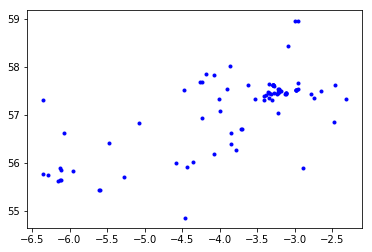

In [7]:
# Try some basic plotting to visualize clusters around Speyside, etc.

from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(np.array(data['Longitude_Decimal']), np.array(data['Latitude_Decimal']), marker='.', color='b')
plt.show()

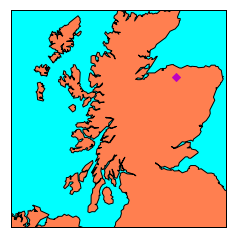

In [12]:
# Playing around with Basemap

# Set "PROJ_LIB" key to load Basemap correctly:
# https://stackoverflow.com/questions/52295117/basemap-import-error-in-pycharm-keyerror-proj-lib
import os
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
map = Basemap(llcrnrlon=-8,llcrnrlat=55,urcrnrlon=-1.6,urcrnrlat=58.6,
             resolution='i', projection='tmerc', lat_0 = 56.974652, lon_0 = -4.266376)
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

# Plot one point
x, y = map(data['Longitude_Decimal'][40], data['Latitude_Decimal'][40])

map.plot(x, y, marker='D',color='m')

plt.show()